In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [39]:
X1 = np.array(random.sample(range(99999),1000))
X2 = np.array(random.sample(range(99999),1000))
X = np.vstack((X1,X2)).T

In [40]:
u = X.mean()
std = X.std()
X = (X-u)/std

Y = 2*X[:,0]+4*X[:,1]+11

X_train,X_test = X[:800],X[800:]
Y_train,Y_test = Y[:800],Y[800:]

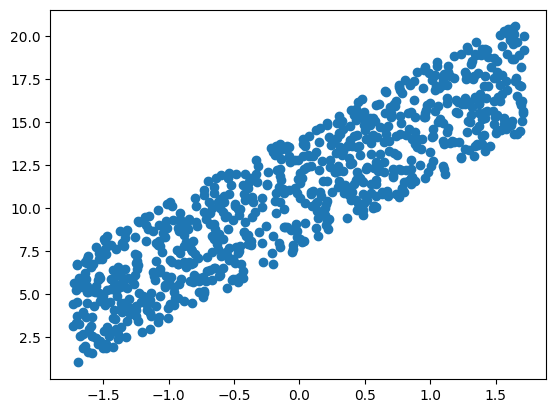

In [41]:
plt.scatter(X_train[:,1],Y_train)

In [42]:
def hypothesis(X,theta):
    # y_ = theta[0]+np.sum(theta[1:]*X,axis=1)
    y_ = theta[0] + np.dot(theta[1:],X.T)
    return y_
# hypothesis(X,[1,1,1])

In [43]:
def cost(X,theta,Y):
    N = X.shape[0]
    y_ = hypothesis(X,theta)
    er = np.sum((y_ - Y)**2)/N
    return er
# cost(X,[11,2,3],Y)

In [44]:
def gradient(X,theta,Y):
    N = X.shape[0]
    y_ = hypothesis(X,theta)
    grad = np.zeros((theta.shape[0],))
    grad[0] = np.sum(y_ - Y)
    grad[1:] = np.dot((y_ - Y),X)
    return grad/N
# gradient(X,np.array([1,1,1]),Y)

In [45]:
def gradient_descent(X,Y,lr=0.001,epochs=1000):
    theta = np.zeros((X.shape[1]+1,))
    costs = []
    for e in range(epochs):
        costs.append(cost(X,theta,Y))
        grad = gradient(X,theta,Y)
        theta = theta - lr*grad
    return theta,costs

In [46]:
theta,costs = gradient_descent(X_train,Y_train,0.01,1000)

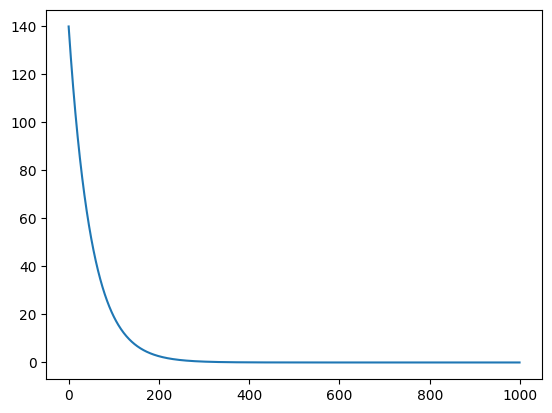

In [47]:
plt.plot(costs)

In [48]:
y_ = hypothesis(X_test,theta)
print(cost(X_test,theta,Y_test))
# for i in range(len(y_)):
#     print(y_[i],Y_test[i])

3.3625562500912755e-07
